#### 线性回归的求解思路：
1. 找到a和b，使得$\sum\limits _{i=1}^n(y_{i} - ax_{i} -b)^2$最小
2. 其中$\sum\limits _{i=1}^n(y_{i} - ax_{i} -b)^2$成为损失函数（loss function），或者叫效用函数（utility function）

#### 拓展到一般的参数学习算法，求解步骤可以分为以下两步：
1. 通过学习问题，确定问题的损失函数
2. 通过最优化损失函数，获得机器学习的模型

最小二乘法的推导：

#### 通过最小二乘法得到的a和b
$$a = \dfrac{\sum\limits_{x=1}^n(x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum\limits_{x=1}^n(x_{i} - \bar{x})^2}$$
$$b = \bar{y} - a\bar{x}$$

#### 简单线性回归是指样本特征只有一个的回归问题，下面手动实现一个简单的线性回归

In [160]:
import numpy as np
class SimpleLinearRegression(object):
    def __init__(self):
        self.a = None
        self.b = None
    
    # fit就是使损失函数取最小值的步骤
    def fit(self, x_train, y_train):
        a = np.sum((x_train - np.mean(x_train)).dot(y_train - np.mean(y_test)))/np.sum(x_train - np.mean(x_train)**2)
        b = np.mean(y_train) - a * np.mean(x_train)
        self.a = a
        self.b = b
        return self

    def predict(self, x_predict):
        y_hat = self.a * x_predict + self.b
        return y_hat
    
    def score(self, y_test, y_hat):
        r_squared = 1 - (np.sum((y_test - y_hat)**2)) / np.sum(((y_test - np.mean(y_test))**2))
        return r_squared

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


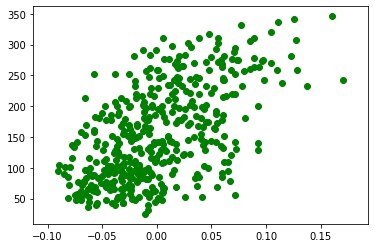

In [169]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
diabetes = load_diabetes() 
print(diabetes.feature_names)
# 只使用bmi这个特征
x = diabetes.data[:,2]
y = diabetes.target
# 绘制散点图，观察发现bmi和diabates确实呈现线性关系
plt.scatter(x, y, c="g")
plt.show()

In [162]:
# 拆分训练集和测试集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [163]:
# 使用训练数据，求出参数a和b
reg1 = SimpleLinearRegression()
reg1.fit(x_train, y_train)
print(reg1.a, reg1.b)

19859.022257018914 150.17189733213652


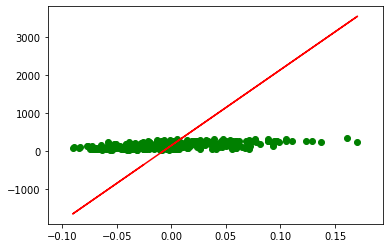

In [164]:
# 绘制出模型
plt.scatter(x_train, y_train, c="g")
plt.plot(x_train, reg1.predict(x_train), color = "r")
plt.show()

#### 衡量线性回归算法的指标函数
**注意：衡量线性回归算法的指标函数和训练数据时使用的损失函数可以不同**  <br>
损失函数$\sum\limits _{i=1}^n(y_{i} - ax_{i} -b)^2$用来衡量模型和训练集中真实值的符合程度，线性回归算法的好坏衡量测试集中模型和真实值的符合程度，主要指标主要有以下几种：
1. 均方误差 MSE（Mean Squared Error）
$$MSE = \dfrac{\sum\limits_{i=1}^n(y_i - \hat{y}_i)^2}{m}$$

2. 均方根误差 RMSE（Root Mean Squared Error）
$$RMSE = \sqrt{MSE} = \sqrt{\dfrac{\sum\limits_{i=1}^n(y_i - \hat{y}_i)^2}{m}}$$

3. 平均绝对误差 MAE（Mean Absolute Error）
$$MAE = \dfrac{\sum\limits_{i=1}^n\left|y_i - \hat{y}_i\right|}{m} $$

4. R squared
$$SS_{total} = \sum\limits_{i=1}^n(y_i - \bar{y})^2$$
$$SS_{res} = \sum\limits_{i=1}^n(y_i - \hat{y})^2$$
$$R^2 = 1 - \dfrac{SS_{res}}{SS_{total}} = 1 - \dfrac{MSE(\bar{y}, y)}{Var(y)} $$

R sauqred的性质：
1. $R^2 <= 1$
2. $R^2$越大越好，最大值为1
3. 可以将$SS_{total}$看作基准模型，当$R^2$为0时，我们的模型等于基准模型
4. 当$R^2<0$时，我们的模型不如基准模型，说们我们的数据不存在线性关系

In [165]:
# 使用测试数据，使用R^2测试模型的好坏
y_hat = reg1.predict(x_test)
reg1.score(y_test, y_hat)

-153.2158616569824

In [166]:
# 使用sklearn中的r2_score函数来计算R^2
# 与自己计算得到的结果相同
from sklearn.metrics import r2_score
r2_score(y_test, y_hat)

-153.2158616569824